# Practical 1: Exploring time series data - model answers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Import emergency department reattendance data.**  

This is a time series from a hospital that measures the number of patients per month that have reattended an ED within 7 days of a previous attendance.

This can be found in **"data/ed_reattend.csv"** or 
https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/main/data/ed_reattend.csv

* Hint 1: look back at the lecture notes and see how `pd.read_csv()` was used.  

* Hint 2: The format of the 'date' column is in UK standard dd/mm/yyyy.  You will need to set the `dayfirst=True` of `pd.read_csv()` to make sure pandas interprets the dates correctly.

* Hint 3: The data is monthly and the dates are all the first day of the month.  This is called monthly start and its shorthand is 'MS'

In [3]:
url = 'https://raw.githubusercontent.com/hsma5/9a_introduction_to_forecasting/' \
        + 'main/data/ed_reattend.csv'
reattends = pd.read_csv(url,
                        index_col='date', 
                        parse_dates=True,
                        dayfirst=True)
reattends.index.freq = 'MS'

**Step 2: Check the shape of the `DataFrame` and print out the first 5 observations**

In [4]:
reattends.shape

(43, 1)

In [5]:
reattends.head()

,reattends
date,
2014-04-01,1094
2014-05-01,1266
2014-06-01,1170
2014-07-01,1239
2014-08-01,1197


**Step 3: Check the minimum and maximum date of the series**



In [6]:
reattends.index.min()

Timestamp('2014-04-01 00:00:00', freq='MS')

In [7]:
reattends.index.max()

Timestamp('2017-10-01 00:00:00', freq='MS')

**Step 4: Create a basic plot of the time series**

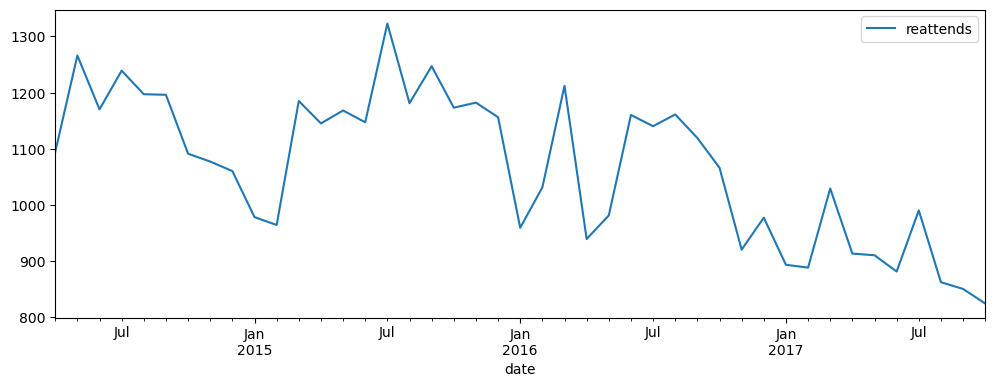

In [8]:
_ = reattends.plot(figsize=(12,4))

**Step 5: Improve the appearance of your chart**
    
Try the following:
    
* Add a y-axis label
* Add gridlines to the plot
* Add markers to block
* Change the colour of the line
* Experiment with using seaborn

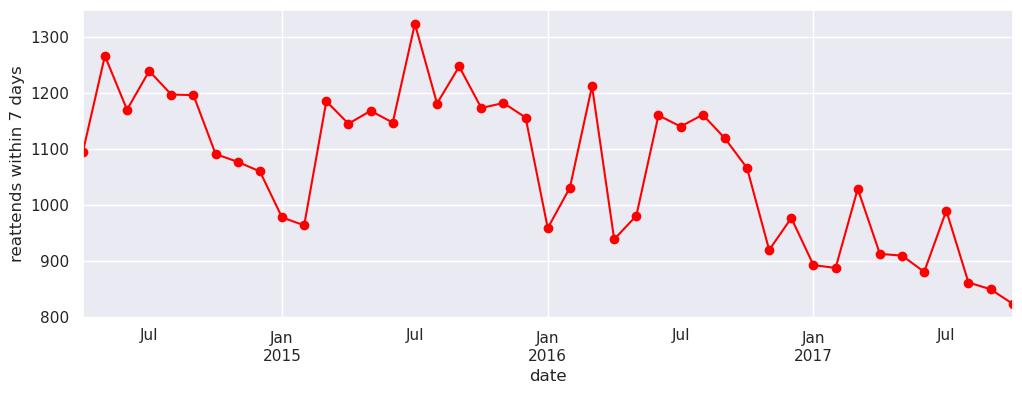

In [9]:
sns.set()
ax = reattends.plot(figsize=(12,4), color='red', marker='o', legend=False)
_ = ax.set_ylabel('reattends within 7 days')

**Step 6: Perform a calender adjustment**

The data is at the monthly level.  Therefore some of the noise in the time series is due to the differing number of days per month.  Perform a calender adjust and plot the daily rate of reattendance.

In [22]:
reattends.index

DatetimeIndex(['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [10]:
reattends.index.days_in_month

Int64Index([30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
            30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
            28, 31, 30, 31, 30, 31, 31, 30, 31],
           dtype='int64', name='date')

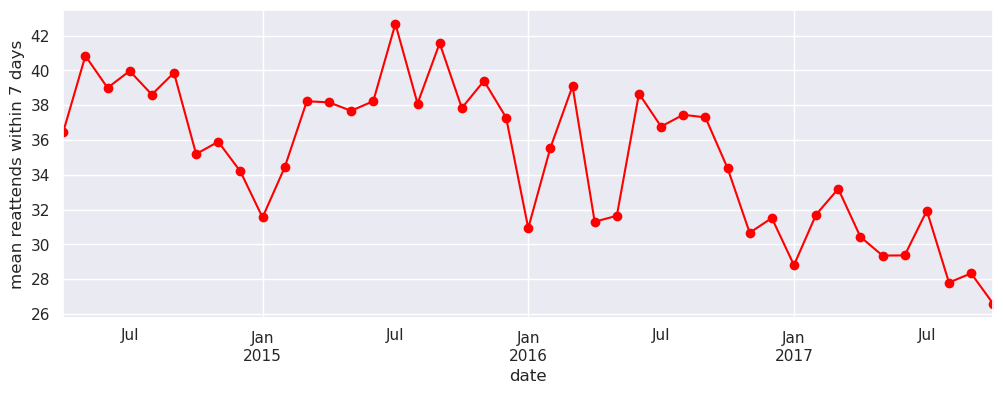

In [11]:
reattend_rate = reattends['reattends'] / reattends.index.days_in_month


ax = reattend_rate.plot(figsize=(12,4), color='red', marker='o', legend=False)


_ = ax.set_ylabel('mean reattends within 7 days')

**Step 7: Run a smoother through the series to assess trend**

Hint:  Try using the `.rolling` method of dataframe with a `window=12` and `center=True` to create a 12 month centred moving average 

Is there any benefit from switchoing to a 6 month MA?  Why does the 6-MA look different to the 12-MA.

Use the calender adjusted data.

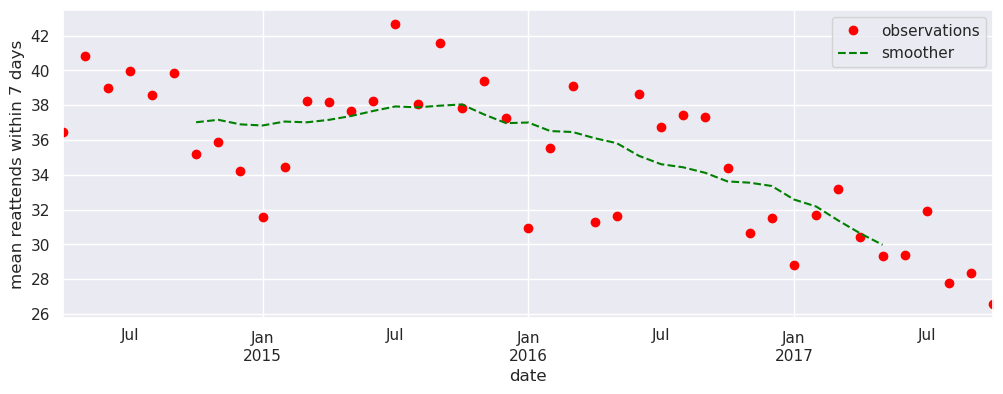

In [12]:
WINDOW = 12
smoother = reattend_rate.rolling(window=WINDOW, center=True).mean()

sns.set()
ax = reattend_rate.plot(figsize=(12,4), color='red', marker='o', linestyle='')
smoother.plot(ax=ax, color='green', linestyle='--')
ax.set_ylabel('mean reattends within 7 days')
_ = ax.legend(['observations', 'smoother'])

**Step 8: Perform a seasonal decomposition on the time series**

Plot the trend, seasonal and remainder components of the decomposition.

Try both an additive and multiplicative model.  What is the difference between the two models?

* Hint: Look back at the lecture for a function to help you.




In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
decomp = seasonal_decompose(reattend_rate, period=12, model='add')

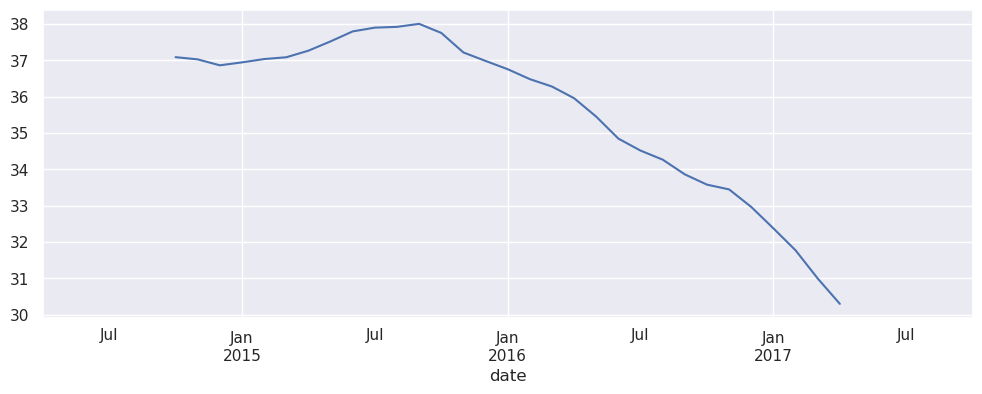

In [15]:
_ = decomp.trend.plot(figsize=(12,4))

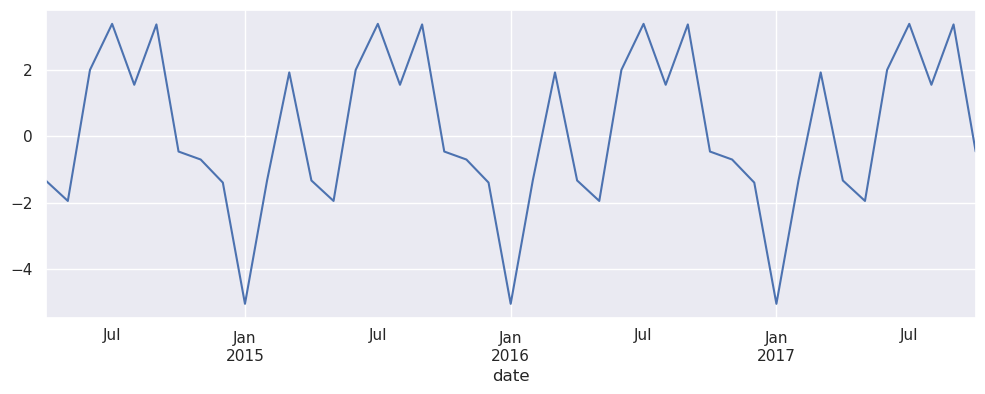

In [16]:
_ = decomp.seasonal.plot(figsize=(12,4))

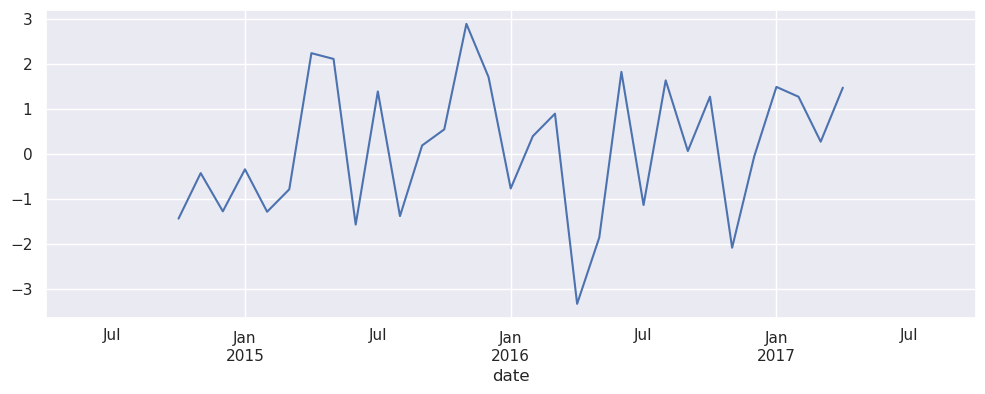

In [17]:
_ = decomp.resid.plot(figsize=(12,4))